In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# as cabin columns has less than 60% null value there is no use.. drop it
df.drop(columns=['Cabin'], inplace=True)

In [6]:
# check null sum
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [7]:
#age and embarked has null values till.. need to work on it
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
#embardked=S is more frequent that is categoriacal median
df['Embarked'].fillna('S',inplace=True)

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [10]:
# work on age columns
# 1st approach all values with mean
# df['Age'].fillna(df['Age'].mean(), inplace=True)


#2nd approach.. 
# 67% values of age lies between mean-1st std deviation to mean+1st deviation
# so filling random values between mean-1 to mean+1 std deviation
#177 numbers are missing
varAge = np.random.randint(df['Age'].mean()- df['Age'].std(), df['Age'].mean() + df['Age'].std(), 177)

In [11]:
df['Age'][df['Age'].isnull()] = varAge
# values are copied....

C:\Users\Darshi\AppData\Local\Temp\ipykernel_18352\3125248868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][df['Age'].isnull()] = varAge


In [12]:
# number of people survived in 1 class
df[df['Pclass']==1]['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [13]:
#
df.groupby(['Pclass'])['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [14]:
#percentage of people survived in pclass..
df.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [15]:
# female and male percentages of servival chances
df.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [16]:
df.groupby(['Sex'])['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [17]:
df.groupby(['Embarked'])['Survived'].mean()
# from perticluar city called C has survived percetnage C

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

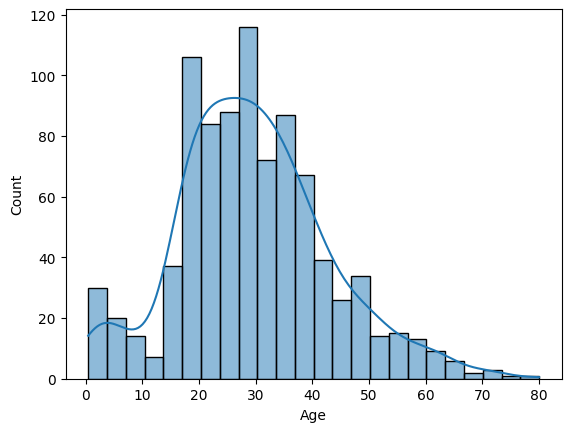

In [18]:
sns.histplot(df['Age'], kde=True)
plt.show()

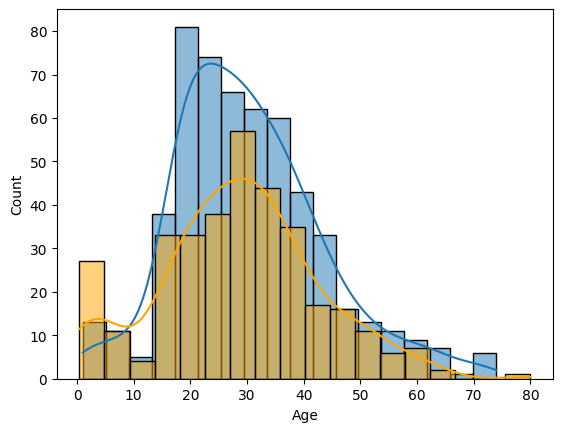

In [19]:
# comparison between survived and died age wise.. 
# kids saved more

sns.histplot(df['Age'][df['Survived']==0], kde=True)
sns.histplot(df['Age'][df['Survived']==1], kde=True,color='orange')

plt.show()

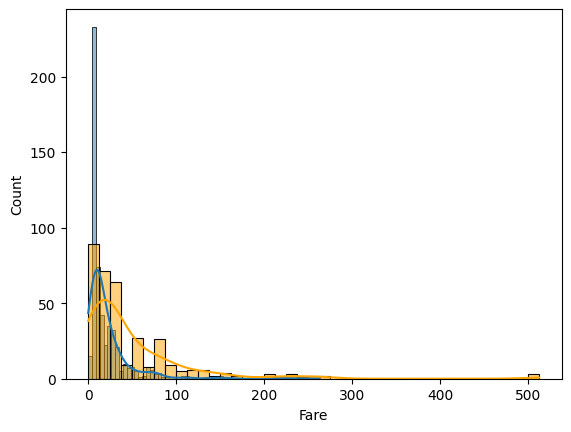

In [20]:
# corelation between fare and survived....
sns.histplot(df['Fare'][df['Survived']==0], kde=True)
sns.histplot(df['Fare'][df['Survived']==1], kde=True,color='orange')
plt.show()

In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
# ticket col is not related to survived...
df.drop(columns=['Ticket'], inplace=True)

In [23]:
# sibsp - sibling/spouse with parch

df['family']=df['SibSp'] + df['Parch'] + 1

In [24]:
df['family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family, dtype: int64

In [25]:
df.groupby(['family'])['Survived'].mean()
#pattern of memebers in family chances of survived...

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [26]:
def cal(number):
    if number == 1:
        return "Alone"
    elif number>1 and number<5:
        return "Medium"
    else:
        return "Large"


In [27]:
df['family_size'] = df['family'].apply(cal)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Alone


In [29]:
df.drop(columns=['SibSp','Parch','family'], inplace=True)

In [30]:
df.drop(columns=['Name','PassengerId'], inplace=True)

In [31]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [32]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [33]:
#aplying one-hot Enconding
df = pd.get_dummies(df,columns=['Pclass','Sex','Embarked','family_size'], drop_first=True)


In [35]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [36]:
X.shape

(891, 9)

In [37]:
y.shape

(891,)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [39]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [40]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
y_pred = classifier.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7864406779661017